In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import plot_tree

In [2]:
# for fraud _check using abbreviation as f_c
f_c=pd.read_csv("Fraud_check.csv")
f_c.head(3)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES


In [3]:
len(f_c["Taxable.Income"])

600

In [4]:
f_c.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
tax_range=[]
for tax in f_c["Taxable.Income"]:
    if tax >= 30000:
        tax_range.append("GOOD")
    elif tax <0 and tax >99620:
           tax_range.append("NaN")
    else:
        tax_range.append ("RISKY")
        #f_c["tax_range"]=pd.Series(data=tax_range)
print(f_c)
f_c['tax_range']=pd.Series(tax_range)


    Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595             

In [6]:
f_c["tax_range"].value_counts()

GOOD     476
RISKY    124
Name: tax_range, dtype: int64

In [7]:
f_c.tail(5)


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_range
595,YES,Divorced,76340,39492,7,YES,GOOD
596,YES,Divorced,69967,55369,2,YES,GOOD
597,NO,Divorced,47334,154058,0,YES,GOOD
598,YES,Married,98592,180083,17,NO,GOOD
599,NO,Divorced,96519,158137,16,NO,GOOD


In [8]:
f_c.tax_range.value_counts()

GOOD     476
RISKY    124
Name: tax_range, dtype: int64

In [9]:
f_c["Taxable.Income"].max()

99619

In [11]:
f_c["Taxable.Income"].min()

10003

In [12]:
f_c["Taxable.Income"].mean()

55208.375

In [13]:
# as per the case study we should consider the taxable income<=30000 as risky and others as good create a columns which defines
# the taxable inmcome as good and = risky
#create the new column whic divides the Taxable income into risky and good

In [14]:
#f_c["Tax_range"]=pd.cut(fraud_check["Taxable.Income"],bins=[10000,30000,99000],labels=["Risky","Good"])

In [15]:
# lets convert all the categorical data to discrete from using labels
lm=LabelEncoder()
f_c["Undergrad"]=lm.fit_transform(f_c["Undergrad"])
f_c["Marital.Status"]=lm.fit_transform(f_c["Marital.Status"])
f_c["Urban"]=lm.fit_transform(f_c["Urban"])
f_c["tax_range"]=lm.fit_transform(f_c["tax_range"])

# lets assume the taxable income <=30000 as risky=1 and above the taxable income values as good=0

In [16]:
f_c.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_range
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
5,0,0,33329,116382,0,0,0
6,0,0,83357,80890,8,1,0
7,1,2,62774,131253,3,1,0
8,0,2,83519,102481,12,1,0
9,1,0,98152,155482,4,1,0


In [17]:
f_c.tail(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_range
590,0,1,43018,85195,14,1,0
591,1,2,27394,132859,18,1,1
592,1,2,68152,75143,16,0,0
593,0,0,84775,131963,10,1,0
594,0,1,47364,97526,9,1,0
595,1,0,76340,39492,7,1,0
596,1,0,69967,55369,2,1,0
597,0,0,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0
599,0,0,96519,158137,16,0,0


In [18]:
# lets normalise the the values for smooth and accurate operations
def norm_fun(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [19]:
f_c_norm=norm_fun(f_c)

In [20]:
f_c_norm.tail(8)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_range
592,1.0,1.0,0.648869,0.283703,0.533333,0.0,0.0
593,0.0,0.0,0.834360,0.610256,0.333333,1.0,0.0
594,0.0,0.5,0.416901,0.412341,0.300000,1.0,0.0
595,1.0,0.0,0.740236,0.078811,0.233333,1.0,0.0
596,1.0,0.0,0.669122,0.170058,0.066667,1.0,0.0
597,0.0,0.0,0.416566,0.737240,0.000000,1.0,0.0
598,1.0,0.5,0.988540,0.886810,0.566667,0.0,0.0
599,0.0,0.0,0.965408,0.760683,0.533333,0.0,0.0


In [21]:
# lets divide the dataset into two parameters 
X=f_c_norm.iloc[:,0:5]
Y=f_c_norm.iloc[:,-1]

In [22]:
len(X)

600

In [23]:
len(Y)

600

In [24]:
# lets divide the dataste into train and test components
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [25]:
#fraud_check_norm["income"]="<=30000"
#fraud_check_norm.loc[df["Taxable.Income"]>=30000,"income"]="good"
#fraud_check_norm.loc[df["Taxable.Income"]<=30000,"income"]="Risky"

LETS CONSIDER THE DESICION TREE CLASSFIER AS THE TARGET VARAIBLE WE SET IS THE CATEGORICAL

DECISION TREE CLASSIFIER USING THE ENTROPY CREATIRION

In [26]:
model1=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=40)
model1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=40)

In [27]:
y_pred1=model1.predict(x_test)
y_pred1

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1.])

In [28]:
pd.Series(y_pred1).value_counts()

0.0    94
1.0    26
dtype: int64

In [29]:
np.mean(y_pred1==y_test)

1.0

In [30]:
print(classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        94
         1.0       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [31]:
accuracy_score(y_pred1,y_test)

1.0

DESICION TREE USING GINI

In [32]:
model2=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=40)
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=40)

In [33]:
y_pred2=model2.predict(x_test)
y_pred2

array([0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       1.])

In [34]:
np.mean(y_pred2==y_test)

1.0

In [35]:
accuracy_score(y_pred2,y_test)

1.0

In [36]:
print(classification_report(y_pred2,y_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        94
         1.0       1.00      1.00      1.00        26

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



# LETS PLOT THE TREE 

[Text(0.5, 0.75, 'X[2] <= 0.224\ngini = 0.325\nsamples = 480\nvalue = [382, 98]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 98\nvalue = [0, 98]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 382\nvalue = [382, 0]')]

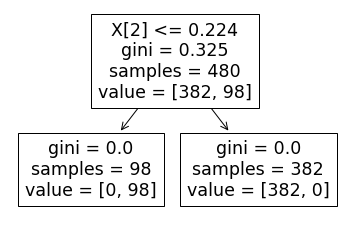

In [37]:
# for gini model
tree.plot_tree(model2,max_depth=4)

[Text(0.5, 0.75, 'X[2] <= 0.224\nentropy = 0.73\nsamples = 480\nvalue = [382, 98]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 98\nvalue = [0, 98]'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 382\nvalue = [382, 0]')]

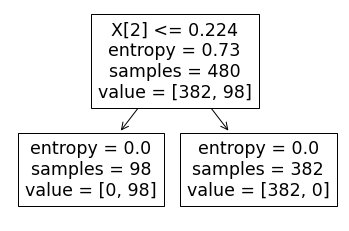

In [38]:
# for entropy model
tree.plot_tree(model1,max_depth=3)